# An Introduction to Snow Pits
CEWA 568 Snow Hydrology - Final Project
Spring Quarter 2023

Daniel Hogan


### What is a snow pit?

A snow pit is simply a trench dug in the snow to provide a curious observer insight into the structure and history of the snowpack. Depending on the snow pack one is seeking to measure, pits can be very shallow or extremely deep. They begin by selecting a site location for the pit. A number of questions must be asked prior to selcting a location including:
- **What information is most important when digging my pit?**
  - This is a broad question, but important to ask to determine what the focus should be for the pit. Some examples include pits: to assess avalanche risk through weak layers and stability tests in the snowpack, derive consistent temperature and density measurements through a profile of the snowpack, identify layers and grain characteristics within a snowpack.
- **Do I want my pit in a clear location or near trees?** 
  - The energy balance changes dramatically in trees or the open. Determine if a pit under a canopy or in the open sky is better for the information needed from the pit.
- **Do I want my pit in a flat site or on a slope?**
  -  Slope is important to consider, especially if a pit is being dug for avalanche testing. A pit on a flat slope will likely not be representative of avalanche conditions in steeper terrain. On the other hand, if the desire is to gather measurements near a meteorological station that is flat, it would likely be best to mimic the surrounding terrain and choose a flat site.
- **Will I dig multiple pits at this location?** 
  - In the Sublimation of Snow campaign, we dug 48 pits at the "same" location by backfilling each days pit and progressing about a half meter forward each day. Determine if the site you choose will be able to accommodate a series of pits, if multiple are being dug.
- **When I dig my pit, which direction is the sun shining?** 
  - What time of day will you be digging? Always make sure the sun in facing the same direction as the snow pit wall that measurements are being taken from. This helps to mitigate the impact of the warm sun's energy on the surface of the pit wall face
- **What is the weather like?**
  - Exposing oneself to cold, harsh conditions can be invigirating but also dangerous. Make sure you are prepared with warm, dry, waterproof clothes, appropriate snow travel gear and safety gear, food, water, emergency shelter, satellite communication device, and knowledge of the area you are traveling in and to. Being aware of changing weather conditions and current conditions can help identify times when it may not be possible to dig a suitable pit.



<img src=".\figures_for_notebook\danny_in_pit.jpg"  width="400" height="300">

<img src=".\figures_for_notebook\super_deep_pit.jpg"  width="200" height="300">
<img src=".\figures_for_notebook\small_pit.jpg"  width="400" height="300">

Images courtesy of (right to left) Alex Hager, McKenzie Skiles at the University of Utah, Domine et al (2018)


### Why is a snow pit useful?

A snow pit allows an interested person a glimpse into the fantastic history of the seasonal snow pack. It allows one to investigate changes to the snow from current and past weather events and to get a better understanding for the evolution of the snow pack over this time, as well as current states of the snow pack - like water storage in the form of snow water equivalent and temperature. When dug in series over the winter, one can really get a strong understanding for how different weather systems and patterns influenced how the snow pack changed over time.

### What tools are needed to dig a snow pit?
 
Tools are relatively easy to get at a hardware store our outdoor outfitter and include:
- snow shovel (metal!) - to dig the pit
- snow probe - to see how far one has to dig
- collapsible ruler - to measure depth and layer thickness
- notebook (waterproof) - to write all the notes
- density cutter (see examples here: https://snowmetrics.com/shop/rip-1-cutter-1000-cc/) - to measure density
- thermometer (infrared thermometer gun for surface temperatures) - to measure internal and surface temperatures
- popsicle sticks  - to differentiate layers
- kitchen scale - to measure the weight of the snow filled density cutter
- snow grain magnifier and crystal card - to observe snow grains grains (see examples here: https://snowmetrics.com/product-category/magnifiers-and-loupes/)
- cut out foam pad - to sit on while taking measurements


### What information can I derive from a snow pit?
Lot's of useful information can be derived from a snow pit including:
- depth of the snow
- snow surface characteristics (wind blown, surface hoar, fresh snow)
- height of different discernable layers 
- grain characteristics within a layer
- temperature profile in the snowpack
- snow density profile in the snow back
### As an example of what a pit looks like and how density is measured, take a look at this video from AGCI courtesy of Emilio Mateo
<iframe width="560" height="315" src="https://www.youtube.com/embed/4Vvlrem4t4E" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Okay after our introduction, let's see some data!

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import xarray as xr
import numpy as np

The `snow_pit_parser.py` file in this folder will allow you to pull all the snow pit data. The files `kettle_ponds_snowpit_layers.nc` and `kettle_ponds_snowpit_layers.nc` are the two files this script will produce, but we already have them loaded up. If you need to get the files, just run `python snow_pit_parser.py` in your terminal and press `Enter`.

In [11]:
# Open our data files
ds_data = xr.open_dataset('./kettle_ponds_snowpit_profiles.nc')
ds_layer = xr.open_dataset('./kettle_ponds_snowpit_layers.nc')
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-1]).plot(label = 'surface')
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-2]).plot(label = '-10cm')
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-3]).plot(label = '-20cm')
plt.legend()

### Okay, we've got a bunch of snow pit data, now what?

Let's visualize a snow pit's depth and density measurements. We'll go with a snow pit that Eli and Danny dug on January 21. You can specify the date, the snow pit ID number or just select a random number between 0 and 47 to get a snow pit or a date between January 6, 2023 and March 16, 2023 (Note - snow pits were numbered KP01 to KP48 for Kettle Ponds data. With python's zero-indexing, selecting on a number between 0 and 47 is a simple way to start). Here I'll show the three different ways you can do that.

In [12]:
# Index using the date
ds_data.sel(time='2023-01-21T09:41:00')

<xarray.Dataset>
Dimensions:      (depth: 146)
Coordinates:
  * depth        (depth) float64 0.0 2.0 3.0 4.0 5.0 ... 155.0 159.0 161.0 165.0
    time         datetime64[ns] 2023-01-21T09:41:00
    id           object ...
Data variables:
    temperature  (depth) float64 ...
    density      (depth) float64 ...
Attributes: (12/26)
    datetime_str:      2023-01/-06, 10:48:00
    depthUnits:        cm
    coordType:         lat_long
    elvUnits:          m
    pitNotes:          
    precip:            NO
    ...                ...
    useSymbols:        true
    first:             Daniel
    last:              Hogan
    name:              Daniel Hogan
    email:             dlhogan@uw.edu
    affil:             University of Washington

In [13]:
# Index using the pit number - this will require some later filtering of nans
ds_data.where(ds_data.id=='KP11')

<xarray.Dataset>
Dimensions:      (time: 48, depth: 146)
Coordinates:
  * depth        (depth) float64 0.0 2.0 3.0 4.0 5.0 ... 155.0 159.0 161.0 165.0
  * time         (time) datetime64[ns] 2023-01-06T10:48:00 ... 2023-03-16T07:...
    id           (time) object 'KP01' 'KP02' 'KP03' ... 'KP46' 'KP47' 'KP48'
Data variables:
    temperature  (time, depth) float64 nan nan nan nan nan ... nan nan nan nan
    density      (time, depth) float64 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/26)
    datetime_str:      2023-01/-06, 10:48:00
    depthUnits:        cm
    coordType:         lat_long
    elvUnits:          m
    pitNotes:          
    precip:            NO
    ...                ...
    useSymbols:        true
    first:             Daniel
    last:              Hogan
    name:              Daniel Hogan
    email:             dlhogan@uw.edu
    affil:             University of Washington

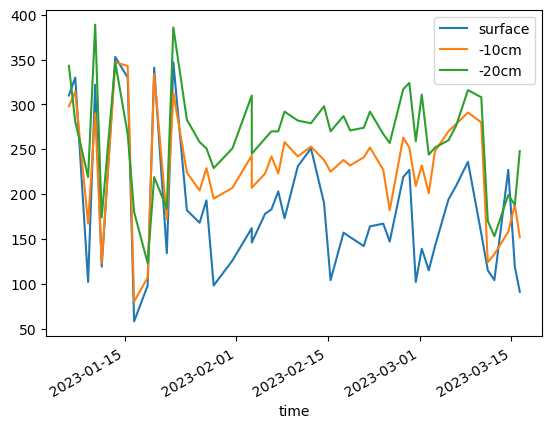

In [40]:
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-1]).plot(label = 'surface')
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-2]).plot(label = '-10cm')
ds_data.to_dataframe()[['density']].dropna().groupby('time').apply(lambda df: df['density'].iloc[-3]).plot(label = '-20cm')
plt.legend()

In [24]:
# Index using the index number
pd.set_option('display.max_rows', 500)
ds_data.isel(time=10).to_dataframe()['density'].dropna().iloc[-1]

depth
12.0     224.0
22.0     365.0
32.0     299.0
42.0     414.0
52.0     310.0
62.0     319.0
72.0     333.0
82.0     219.0
92.0     184.0
102.0    172.0
122.0    134.0
Name: density, dtype: float64

### Let's plot our pit!

In [6]:
ds_data.depth.max()

<xarray.DataArray 'depth' ()>
array(165.)

Text(0.5, 1.0, 'Example Snow Pit Density Profile\nMar 14 2023')

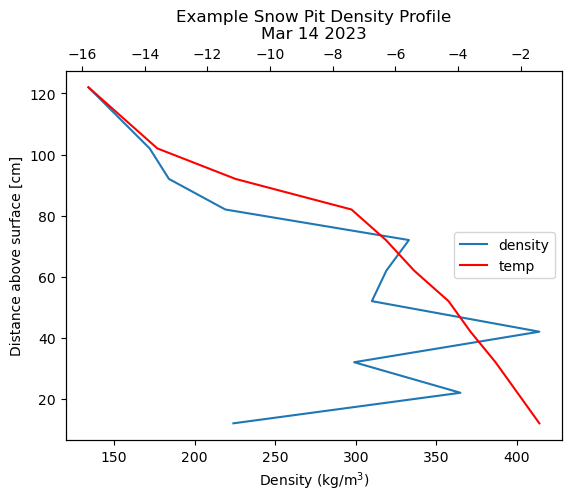

In [7]:
plt.plot(ds_data.isel(time=10).dropna(dim='depth').density,ds_data.isel(time=10).dropna(dim='depth').depth, label='density')
plt.plot([],[], color='r', label='temp')
plt.xlabel("Density (kg/m$^3$)")
plt.ylabel("Distance above surface [cm]")
plt.legend(loc='center right')
plt.twiny()
plt.plot(ds_data.isel(time=10).dropna(dim='depth').temperature,ds_data.isel(time=10).dropna(dim='depth').depth, color='r', label='temp')
# plt.xlim(-10,0)
plt.ylabel("Temperature C")
plt.title("Example Snow Pit Density Profile\nMar 14 2023")

Here we see that temperature increases as we move away from the surface-air interface and density also generally increases as well.

### Now let's compare some measurements to SOS data!

We'll compare temperature profiles, surface temperatures, snow depth, and snow density.

In [8]:
# This uses functiond developed by Eli Schwat
import urllib
# Provide the path to a directory you want to download the SoS files to
###########CHANGE THIS TO THE CORRECT LOCATION###################
download_directory = '../data/sosnoqc/'

# Provide a the start and end dates you want to download
start_date_mid = '20230106'
end_date_mid = '20230316'

def download_sos_data_day(date, local_download_dir, cache=True):
    """Download a netcdf file from the ftp url provided by the Earth Observing 
    Laboratory at NCAR. Data comes in one NetCDF file per day, Reynolds-Averaged 
    with a 5-minute averaging period.

    Args:
        date (str, optional): String representing a date in format '%Y%m%d'. Defaults to '20221101'.
        local_download_dir (str, optional): Directory to which files will be downloaded. Defaults 
                    to 'sosnoqc'; this directory will be created if it  does not already exist.
        cache (bool, optional): If True, looks in `local_download_dir` for requested  file, if it 
                    exists, does not redownload file. If False, downloads file from the FTP server.

    Returns:
        _type_: Relative path to the downloaded file
    """
    base_url = 'ftp.eol.ucar.edu'
    path = '/pub/archive/isfs/projects/SOS/netcdf/noqc_geo/'
    file = f'isfs_{date}.nc'
    os.makedirs(local_download_dir, exist_ok=True)
    full_file_path = 'ftp://'+base_url+path+file
    download_file_path = os.path.join(local_download_dir, file)
    if cache and os.path.isfile(download_file_path):
        print(f"Caching...skipping download for {date}")
    else:
        urllib.request.urlretrieve(
            full_file_path,
            download_file_path   
        )
    return download_file_path

### Let's select the variables we want to compare and pull in some other data:

- We want to compare internal snow temperatures, so we want the T_snow variable at either UW or D towers. We'll use D since this was closer to our pit locations. 
- We want to compare surface temperature measurements, so we will grab the info needed for that (Vtherm, Vpile, IDir)
- We'll lastly grab all the snow pillow data for eventual density comparisons
- We'll grab Ethan Gutmann's lidar snow depth estimates for lidar 6 as that captures a few different pillows. We'll end up just using Pillow C data since it appeared the most reasonable in comparison to our pit depths.


In [9]:
VARIABLES =[ 'Tsnow_0_4m_d',
             'Tsnow_0_5m_d',
             'Tsnow_0_6m_d',
             'Tsnow_0_7m_d',
             'Tsnow_0_8m_d',
             'Tsnow_0_9m_d',
             'Tsnow_1_0m_d',
             'Tsnow_1_1m_d',
             'Tsnow_1_2m_d',
             'Tsnow_1_3m_d',
             'Tsnow_1_4m_d',
             'Tsnow_1_5m_d',
            "Vtherm_d", 
            "Vpile_d",
            "IDir_d",
            'SWE_p1_c',
            'SWE_p2_c',
            'SWE_p3_c',
            'SWE_p4_c',
            'T_2m_c',
        ]
# Plot lidar snow depth statistics
lidar_6_ds = xr.open_dataset(f"../HW-4/lidar/lidar_l{6}_pillow_depths.nc")
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date_mid, '%Y%m%d'),
    dt.datetime.strptime(end_date_mid, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset_temp = xr.concat(all_datasets, dim='time')
sos_dataset_temp = sos_dataset_temp.shift(time=-84)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/elilouis/sublimationofsnow/analysis/sos/HW-4/lidar/lidar_l6_pillow_depths.nc'

### Next we'll average our data to hourly means and calculate density from SWE and snow depth

Remember: $\rho_{snow} = \frac{SWE}{Depth}$ or unit wise, thats $kg/m^3 = mm_{swe} *  \frac{1m}{1000mm} * \frac{1000 kg}{1 m^3} *\frac{1}{m_{depth}}$

In [10]:
sos_dataset_60min = sos_dataset_temp.resample(time='1H').mean()
sos_dataset_60min_interpolated = sos_dataset_60min.interp_like(lidar_6_ds)
density_uw = sos_dataset_60min_interpolated['SWE_p1_c'] / lidar_6_ds.sel(pillow='UW', stat='median')['snowdepth']
density_c = sos_dataset_60min_interpolated['SWE_p3_c'] / lidar_6_ds.sel(pillow='C', stat='median')['snowdepth']
density_d = sos_dataset_60min_interpolated['SWE_p4_c'] / lidar_6_ds.sel(pillow='D', stat='median')['snowdepth']

NameError: name 'sos_dataset_temp' is not defined

### Function to add surface temperature to our dataset

In [ ]:
# The function below calculates the surface temperatures from the Apogees
def apogee2temp(ds,tower):
    # hard-coded sensor-specific calibrations
    Vref = 2.5
    ID = ds[f"IDir_{tower}"]
    sns = [136, 137, 138, 139, 140]
    im = [ sns.index(x) if x in sns else None for x in ID ][0]
    # unclear if we want these, or scaled up versions
    mC0 = [57508.575,56653.007,58756.588,58605.7861, 58756.588][im] * 1e5
    mC1 = [289.12189,280.03380,287.12487,285.00285, 287.12487][im] * 1e5
    mC2 = [2.16807,2.11478,2.11822,2.08932, 2.11822][im] * 1e5
    bC0 = [-168.3687,-319.9362,-214.5312,-329.6453, -214.5312][im]* 1e5
    bC1 = [-0.22672,-1.23812,-0.59308,-1.24657, -0.59308][im]* 1e5
    bC2 = [0.08927,0.08612,0.10936,0.09234, 0.10936][im]* 1e5
    # read data
    Vtherm = ds[f"Vtherm_{tower}"]
    Vpile = ds[f"Vpile_{tower}"]*1000
    # calculation of detector temperature from Steinhart-Hart
    Rt = 24900.0/((Vref/Vtherm) - 1)
    Ac = 1.129241e-3
    Bc = 2.341077e-4
    Cc = 8.775468e-8
    TDk = 1/(Ac + Bc*np.log(Rt) + Cc*(np.log(Rt)**3))
    TDc = TDk - 273.15
    # finally, calculation of "target" temperature including thermopile measurement
    m = mC2*TDc**2 + mC1*TDc + mC0
    b = bC2*TDc**2 + bC1*TDc + bC0
    TTc = (TDk**4 + m*Vpile + b)**0.25 - 273.15
    # sufs = suffixes(TTc,leadch='') # get suffixes
    # dimnames(TTc)[[2]] = paste0("Tsfc.Ap.",sufs)
    return TTc

In [ ]:
sos_dataset_temp['Tsurf_d'] = (['time'],  apogee2temp(sos_dataset_temp, 'd').values)

c:\Users\dlhogan\anaconda3\envs\radiative_transfer\lib\site-packages\xarray\core\computation.py:742: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


### Compare temperature profiles with thermistors

In [ ]:

snowpit_ds = ds_data.isel(time=10)
# We'll print the time so we know what time we need to select from to get the closest thermistor measurements
print(snowpit_ds.time)
# Select from our dataset the time that our snow pit was dug
sos_ds = sos_dataset_temp.sel(time=dt.datetime(2023,1,21,9,41), method='nearest')[['Tsnow_0_4m_d',
                                                       'Tsnow_0_5m_d',
                                                       'Tsnow_0_6m_d',
                                                       'Tsnow_0_7m_d',
                                                       'Tsnow_0_8m_d',
                                                       'Tsnow_0_9m_d',
                                                       'Tsnow_1_0m_d',
                                                       'Tsnow_1_1m_d',
                                                       'Tsnow_1_2m_d',
                                                       'Tsnow_1_3m_d',
                                                       'Tsnow_1_4m_d',
                                                       'Tsnow_1_5m_d']].to_array()
# Get the surface temperature for this time as well
surf_temp =  sos_dataset_temp.sel(time=dt.datetime(2023,1,21,9,41), method='nearest')[['Tsurf_d']].to_array()
thermistor_depths = np.arange(40,160,10)

# Grab the depths and temperature measurements to compare
total_depth = snowpit_ds.temperature.dropna(dim='depth').depth[-1].values
snowpit_temp = snowpit_ds.temperature.dropna(dim='depth')

<xarray.DataArray 'time' ()>
array('2023-01-21T09:41:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-01-21T09:41:00
    id       <U4 'KP11'


Text(0.5, 1.0, 'Snow Temperature Profile comparison - Jan 21, 2023')

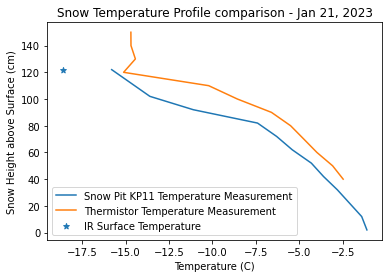

In [ ]:
plt.plot(snowpit_temp, snowpit_temp.depth, label='Snow Pit KP11 Temperature Measurement')
plt.plot(sos_ds,thermistor_depths, label='Thermistor Temperature Measurement')
plt.scatter(surf_temp,total_depth,marker='*', label='IR Surface Temperature')
plt.legend()
plt.ylabel('Snow Height above Surface (cm)')
plt.xlabel('Temperature (C)')
plt.title('Snow Temperature Profile comparison - Jan 21, 2023')

Looks like this pit was slightly colder than the measurements, but the surface temperature was colder than the pit measurements.

### Next, we'll look at another example of temperature profile comparison

In [ ]:
### Compare temperature profiles with thermistors
snowpit_ds = ds_data.isel(time=14)
print(snowpit_ds.time)
sos_ds = sos_dataset_temp.sel(time=dt.datetime(2023,1,27,10,47), method='nearest')[['Tsnow_0_4m_d',
                                                       'Tsnow_0_5m_d',
                                                       'Tsnow_0_6m_d',
                                                       'Tsnow_0_7m_d',
                                                       'Tsnow_0_8m_d',
                                                       'Tsnow_0_9m_d',
                                                       'Tsnow_1_0m_d',
                                                       'Tsnow_1_1m_d',
                                                       'Tsnow_1_2m_d',
                                                       'Tsnow_1_3m_d',
                                                       'Tsnow_1_4m_d',
                                                       'Tsnow_1_5m_d']].to_array()
surf_temp =  sos_dataset_temp.sel(time=dt.datetime(2023,1,27,10,47), method='nearest')[['Tsurf_d']].to_array()
thermistor_depths = np.arange(40,160,10)

total_depth = snowpit_ds.temperature.dropna(dim='depth').depth[-1].values
snowpit_temp = snowpit_ds.temperature.dropna(dim='depth')

<xarray.DataArray 'time' ()>
array('2023-01-27T10:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-01-27T10:47:00
    id       <U4 'KP15'


Text(0.5, 1.0, 'Snow Temperature Profile comparison - Jan 27, 2023')

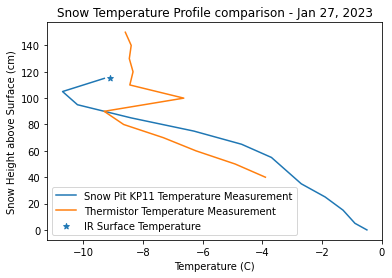

In [ ]:
plt.plot(snowpit_temp, snowpit_temp.depth, label='Snow Pit KP11 Temperature Measurement')
plt.plot(sos_ds,thermistor_depths, label='Thermistor Temperature Measurement')
plt.scatter(surf_temp,total_depth,marker='*', label='IR Surface Temperature')
plt.legend()
plt.ylabel('Snow Height above Surface (cm)')
plt.xlabel('Temperature (C)')
plt.title('Snow Temperature Profile comparison - Jan 27, 2023')

What is different between this date and the previous pit above?

### Compare surface temperatures

In [ ]:
# This will simply grab all the surface measurements and store them in a list from the snow pits. 
surface_temp=[]
# This will grab the concurrent time when surface temperatures were measured at the D tower location
ir_surface_temp=[]
for t in ds_data.time:
    surface_temp.append(ds_data.sel(time=t).temperature.dropna(dim='depth')[-1].values)
    ir_surface_temp.append(sos_dataset_temp['Tsurf_d'].sel(time=t,method='bfill').values)
sos_ds = sos_dataset_temp['Tsurf_d']



### Compare our surface temperature measurements over a couple days

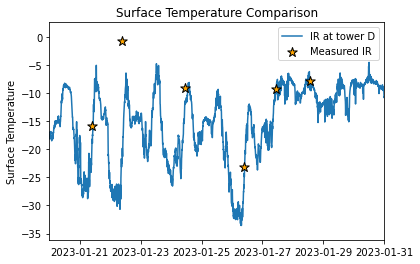

In [ ]:
plt.plot(sos_ds[sos_ds<10].time,sos_ds[sos_ds<10], label='IR at tower D')
plt.scatter(ds_data.time.to_series(),surface_temp, marker='*', color='orange', s=100, ec='k',zorder=10, label='Measured IR')
plt.xlim(dt.date(2023,1,20),dt.date(2023,1,31))
plt.ylabel('Surface Temperature')
plt.title('Surface Temperature Comparison')
plt.legend()

### Let's look at how these surface temperatures evaluated against one another over time from Jan 6-Mar 16, 2023.

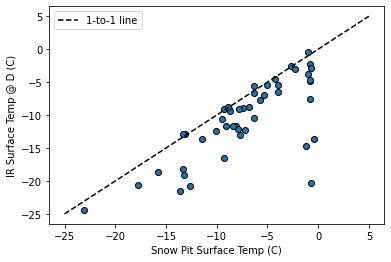

In [ ]:
plt.scatter(surface_temp,np.array(ir_surface_temp), ec='k')
plt.plot([-25,5],[-25,5], color='k', ls='--', label='1-to-1 line')
plt.ylabel('IR Surface Temp @ D (C)')
plt.xlabel('Snow Pit Surface Temp (C)')
plt.legend()

### What do you think might cause the positive bias in the temperatures and discrepancies?

### Compare pillow snow depth with snow depth

In [ ]:
lidar_6_ds.sel(pillow='C', time=slice('2023-01-06','2023-03-17'))

<xarray.Dataset>
Dimensions:    (time: 149, stat: 6, pillow: 3)
Coordinates:
  * time       (time) datetime64[ns] 2022-10-14 2022-10-15 ... 2023-03-21
  * stat       (stat) object 'mean' 'stddev' 'median' 'min' 'max' 'count'
  * pillow     (pillow) object 'C' 'UW' 'D'
Data variables:
    snowdepth  (time, stat, pillow) float64 0.002006 0.05787 ... 35.0 9.34e+03

### Plot snow depth over time between our snow pit measurements and the lidar 

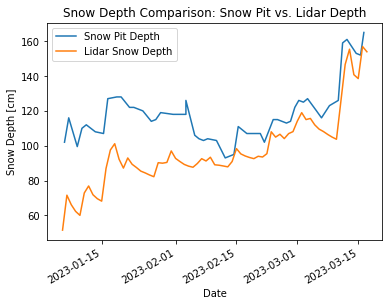

In [ ]:

snow_depth=[]
for t in ds_data.time:
    snow_depth.append(ds_data.sel(time=t).temperature.dropna(dim='depth').depth[-1].values)
plt.plot(ds_data.time, snow_depth, label='Snow Pit Depth')
(lidar_6_ds.sel(pillow='C', stat='mean', time=slice('2023-01-06','2023-03-17'))['snowdepth']*100).plot(label='Lidar Snow Depth')
plt.ylabel('Snow Depth [cm]')
plt.xlabel('Date')
plt.title('Snow Depth Comparison: Snow Pit vs. Lidar Depth')
plt.legend()

### Plot snow density over time

Here we will compute bulk density from the snow pits, which is the average of all the snow density measurements we had for each pit.

In [ ]:
snow_density=[]
for t in ds_data.time:
    snow_density.append(ds_data.sel(time=t).density.dropna(dim='depth').mean().values)

Text(0.5, 1.0, 'Snow Density Measurements')

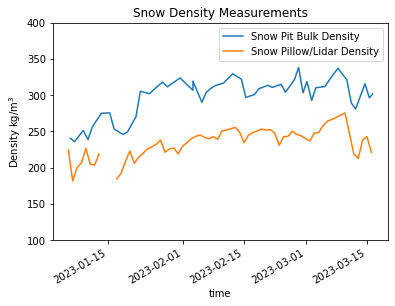

In [ ]:
plt.plot(ds_data.time,snow_density, label='Snow Pit Bulk Density')
density_c.plot(label='Snow Pillow/Lidar Density')
plt.ylim(100,400)
plt.legend()
plt.ylabel('Density kg/m$^3$')
plt.title('Snow Density Measurements')

Why might this bias come about? 

### Lastly, lets look at the structure of the layers dataset

This dataset is a bit sipler than the first one. The only filtering dimension is time with layer as another coordinate. This layer feature is a way to figure out what a layer spreads from. 

In [ ]:
ds_layer

<xarray.Dataset>
Dimensions:      (time: 323)
Coordinates:
    layer        (time) <U16 'Surface_to_49cm' '49cm_to_69cm' ... '22cm_to_0cm'
    tiime        (time) datetime64[ns] 2023-01-06T10:48:00 ... 2023-03-16T07:...
Dimensions without coordinates: time
Data variables:
    grainSize    (time) float64 nan nan nan nan nan nan ... 0.1 0.3 0.3 1.0 2.0
    grainSize1   (time) float64 nan nan nan nan nan nan ... 0.3 1.5 1.5 2.0 4.0
    grainType    (time) object nan 'RGlr' 'RG' 'RGwp' ... 'FCxr' 'FCxr' 'DH'
    grainType1   (time) object nan nan 'RGwp' nan ... 'RGxf' 'RGxf' 'DHxr'
    hardness1    (time) object 'F' '4F' '1F' 'P' '4F' ... '1F' 'F' '4F' '1F' 'F'
    hardness2    (time) object nan nan nan nan nan nan ... nan nan nan nan nan
    layerNumber  (time) object '1' '2' '3' '4' '5' '1' ... '5' '6' '7' '8' '9'
    startDepth   (time) float64 0.0 49.0 69.0 81.0 94.0 ... 95.0 68.0 41.0 22.0
    endDepth     (time) float64 49.0 69.0 81.0 94.0 102.0 ... 68.0 41.0 22.0 0.0

### Let's grab a random pit and take a look

In [ ]:
ds_layer.isel(time=slice(-9,-1))

<xarray.Dataset>
Dimensions:      (time: 8)
Coordinates:
    layer        (time) <U16 'Surface_to_146cm' ... '41cm_to_22cm'
    tiime        (time) datetime64[ns] 2023-03-16T07:12:00 ... 2023-03-16T07:...
Dimensions without coordinates: time
Data variables:
    grainSize    (time) float64 0.3 0.3 0.3 nan 0.1 0.3 0.3 1.0
    grainSize1   (time) float64 1.0 2.0 1.0 nan 0.3 1.5 1.5 2.0
    grainType    (time) object 'PPsd' 'MFcr' 'DFbk' ... 'FCxr' 'FCxr' 'FCxr'
    grainType1   (time) object 'DF' nan 'RG' nan nan 'RGxf' 'RGxf' 'RGxf'
    hardness1    (time) object 'F' '1F+' '4F' '1F' '1F' 'F' '4F' '1F'
    hardness2    (time) object nan nan nan nan nan nan nan nan
    layerNumber  (time) object '1' '2' '3' '4' '5' '6' '7' '8'
    startDepth   (time) float64 165.0 146.0 139.0 112.0 111.0 95.0 68.0 41.0
    endDepth     (time) float64 146.0 139.0 112.0 111.0 95.0 68.0 41.0 22.0

Here we can look at thinks like hand hardness, grain type, grain size, and layer thickness for each layer found in the pit.

### References 
DOMINE, F., BELKE-BREA, M., SARRAZIN, D., ARNAUD, L., BARRERE, M., & POIRIER, M. (2018). Soil moisture, wind speed and depth hoar formation in the Arctic snowpack. Journal of Glaciology, 64(248), 990-1002. doi:10.1017/jog.2018.89